In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
x_train = df.drop('class',axis=1)
y_train = df['class']

In [5]:
rf = RandomForestClassifier(random_state=0)

In [6]:
n_estimators = list(range(10,110,10))
max_depth = list(range(1, 21, 2))
min_samples_leaf = list(range(1,8))

parametrs = {'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': [1.0, 3, 5, 7, 9]}

In [7]:
grid_search_cv_rf = GridSearchCV(rf, parametrs, cv=5, n_jobs=-1)

In [8]:
np.random.seed(0)
grid_search_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [1.0, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
grid_search_cv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 20}

In [12]:
grid_search_cv_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
grid_search_cv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 20}

In [13]:
best_rf = grid_search_cv_rf.best_estimator_

In [14]:
feature_importances = best_rf.feature_importances_

In [19]:
feature_importances_df = pd.DataFrame({'features': list(x_train),
                                      'features_importances': feature_importances })

In [21]:
feature_importances_df.sort_values('features_importances', ascending=False)

,features,features_importances
4,odor,0.178612
19,spore-print-color,0.095079
7,gill-size,0.079868
8,gill-color,0.079614
20,population,0.075672
3,bruises,0.073724
18,ring-type,0.067532
12,stalk-surface-below-ring,0.066249
10,stalk-root,0.059747
6,gill-spacing,0.058694


In [22]:
x_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [24]:
predictions = best_rf.predict(x_test)

In [26]:
sum(predictions)

976

In [27]:
y_truth = pd.read_csv('testing_y_mush.csv')

In [30]:
from sklearn.metrics import confusion_matrix

df = confusion_matrix(predictions,y_truth)

Text(0.5, 1.0, 'Confusion Matrix')

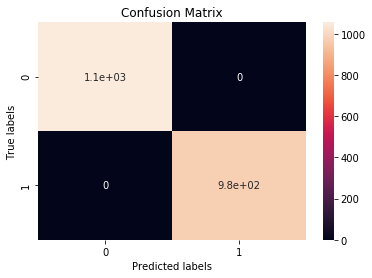

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Визуализируем матрицу
ax = plt.subplot()
sns.heatmap(df, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [48]:
min_samples_split = list(range(1,10,2))
min_samples_split

[1, 3, 5, 7, 9]

In [ ]:
# dataset from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv
df = pd.read_csv('heart.csv', index_col)

In [10]:
x_train = df.drop('target',axis=1)
y_train = df.target

In [15]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

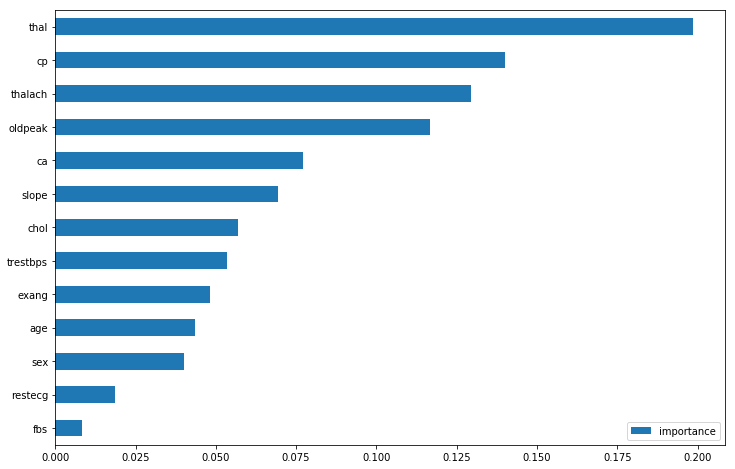

In [19]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))